# [Machine learning] Assignment1.
## 응용수학과 2019017001 김미래

### 1. 회귀분석 실습 코드에서 코드를 실제로 모두 타이핑하시고 #으로 표시된 부분에 주석을 작성하세요. (코드에 대한 설명)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.random.rand(100) #0~1사이의 균일분포에서 난수 matrix array(1행 100열) 생성
y = 0.2*X+0.5           #X에 대한 회귀식 y 생성
Y = 0.2 * X + 0.5+ np.random.normal(0,0.004, size=y.shape)  #정규분포(평균0, 표준편차0.004, size=y만큼)를 따르는 오차를 포함한 data point Y값 생성

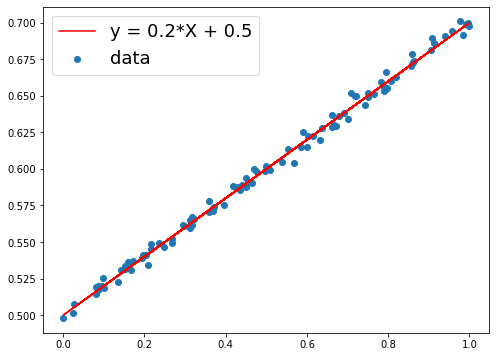

In [17]:
# 실제 data point와 회귀식을 그래프로 확인하기
plt.figure(figsize=(8, 6))
plt.plot(X, y, color='r', label='y = 0.2*X + 0.5')
plt.scatter(X, Y, label='data')
plt.legend(fontsize=18)
plt.show()

In [12]:
#X값과 Y값의 평균
X_bar = X.mean()
Y_bar = Y.mean()

In [13]:
#가중치(회귀식에서 독립변수x의 계수이자 slope) 구하기
calculated_weight = ((X - X_bar) * (Y - Y_bar)).sum() / ((X - X_bar)**2).sum()
print('w: {:.2f}'.format(calculated_weight))

w: 0.20


In [14]:
#편향(회귀식에서 intercept) 구하기
calculated_bias = Y_bar - calculated_weight * X_bar
print('b: {:.2f}'.format(calculated_bias))

b: 0.50


In [15]:
#예측된 data point와 추정 회귀식의 그래프를 같이 확인할 수 있는 함수 정의

def plot_prediction(pred, y): 
    plt.figure(figsize=(8,6))
    plt.scatter(X,y) 
    plt.scatter(X, pred) 
    plt.show()

### 2. Regulization 파일을 보고 결과가 의미하는 바가 무엇인지 설명을 하세요.
코드 하단에 result 작성함.

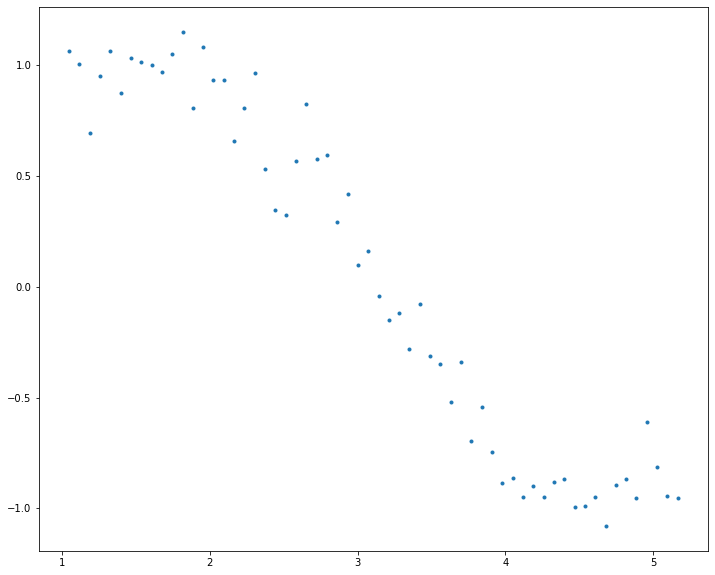

In [18]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [19]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [20]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

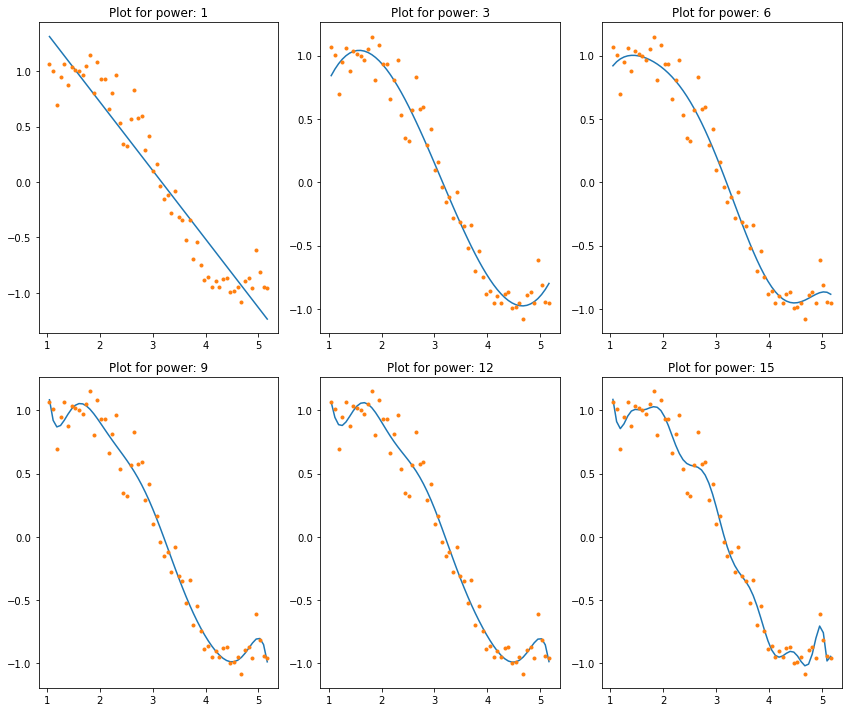

In [21]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [22]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


In [23]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.82552e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


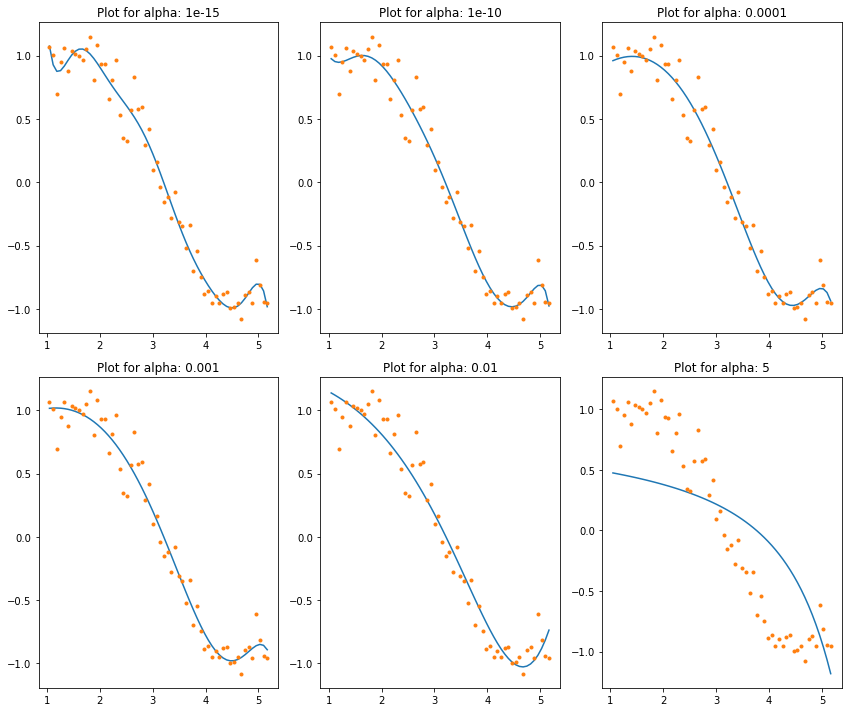

In [24]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [25]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,94,-3e+02,3.8e+02,-2.4e+02,69,-1.7,-3.7,0.37,0.17,-0.022,-0.0061,0.00076,0.00024,-5.6e-05,3.6e-06,-4.6e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


In [26]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

In [27]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47835738259042526, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(
C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4782818399056521, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(
C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4707933019039218, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(


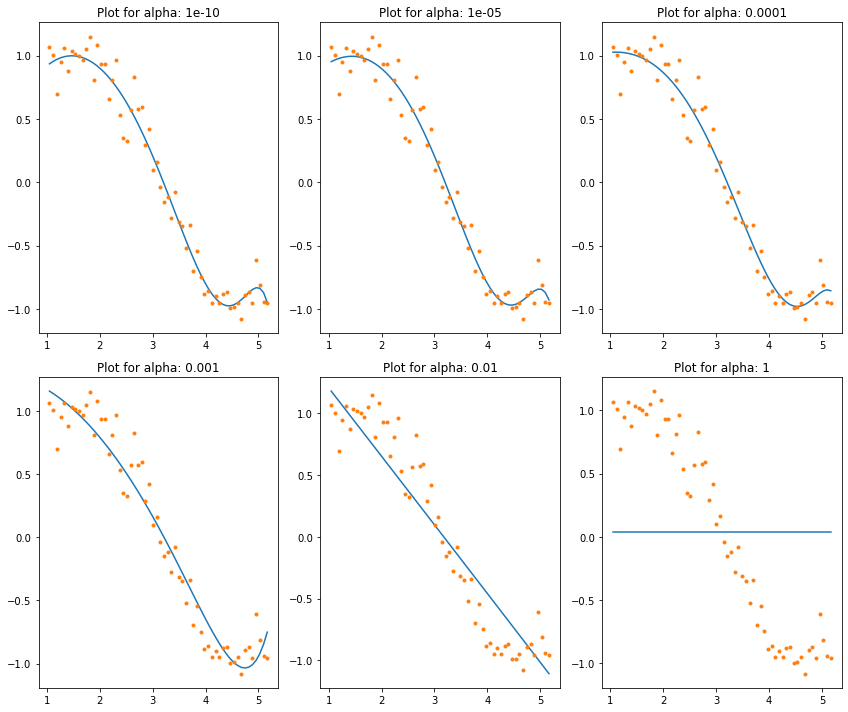

In [28]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [29]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
alpha_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
alpha_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [30]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

## Result
1. 추정 (선형) 회귀식의 최고차항 차수가 높아질수록(model의 complexity가 높아질수록) RSS(회귀식에 대한 오차) 값은 현저히 줄어들지만, *이는 **Overfitting**의 우려가 굉장히 높아진다.* 따라서, 이에 대한 방안으로는 대표적으로 **Ridge regression**과 **Lasso regression**이 있다.
2. **Ridge regression**은 alpha값이 커질수록 RSS값이 커지고 회귀계수값(coefficient)들이 0에 가까울정도로 작아진다. 계수 값들이 0에 가까워질수록 Model complexity는 낮아지고 다중공산성을 방지할 수 있다.
3. **Lasso regression**는  alpha값이 커질수록 RSS값이 커지고 회귀계수값(coefficient)들을 0에 가까워지거나 0으로 줄인다. 따라서 회귀식에서 중요한 feature만 선택하게 된다.(feature selection)
4. **Ridge regression**는 회귀계수의 값을 작게 줄이지만 모든 변수를 채택하기 때문에 모델은 여전히 복잡할 수 있고(성능 저하) **Lasso regression**은 중요한 변수만 채택하여 모델의 성능을 훨씬 높여줄수 있지만 정보의 손실 우려가 발생할 수 있다는 점이 두 회귀식의 차이점이다. 따라서, **Ridge regression**는 삭제하는 변수가 없기 때문에 회귀식의 계수가 0인 경우는 없지만, **Lasso regression**는 중요한 변수를 빼고 제거를 하기 때문에 회귀식의 계수가 0인 경우는 존재한다.(alpha_0.0001,alpha_0.001등->알파값이 커질수록 제거되는 변수도 늘어난다)

### 3. 경사하강법 파일을 열어서 배치, 확률적, 미니배치 경사하강법이 어떤 의미인지 각 코드를 통해 정확히 이해하여 설명해보세요. 파일안에 있는 질문의 답도 작성합니다.
코드 하단에 Summary : Gradient Descent 작성함.

In [10]:
import numpy as np

X = 1.5 * np.random.rand(100, 1)
y = 6 - 2 * X +  np.random.randn(100, 1)
# y = 6 - 2*x

X_b = np.c_[np.ones((100, 1)), X]

In [11]:
eta = 0.01 # 내려가는 스탭의 크기
n_iter = 10000 # 10000번 반복
m = 100 # sample 수
B_hat_BGD = np.random.randn(2,1) # B_hat 초기값

for iteration in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(B_hat_BGD) - y)
    B_hat_BGD = B_hat_BGD - eta * gradients

B_hat_BGD

array([[ 6.17795096],
       [-2.17209365]])

In [12]:
B_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # linalg : 선형대수 모듈
print (B_hat)

[[ 6.17795097]
 [-2.17209366]]


In [13]:
B_path_BGD = []

def plot_gradient_descent(B_hat, eta, B_path=None):
    m = 100
    plt.plot(X, y, "b.")
    n_iter = 10000
    for iter in range(n_iter):
        if iter%1000 == 0:
            X_new = np.array([[0], [1.5]])  # X의 범위 [0, 1.5]
            X_new_b = np.c_[np.ones((2, 1)), X_new]
            y_predict = X_new_b.dot(B_hat)
            
            style = "r-" if iter > 0 else "g--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(B_hat) - y)
        B_hat = B_hat - eta * gradients
        if B_path is not None:
            B_path.append(B_hat)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 1.5, 0, 10])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [14]:
# 학습률 비교
# 학습률이 너무 낮거나 높으면 minimum에 수렴하지 않고 발산하게 되므로 적절한 학습률을 정하는것이 바람직.

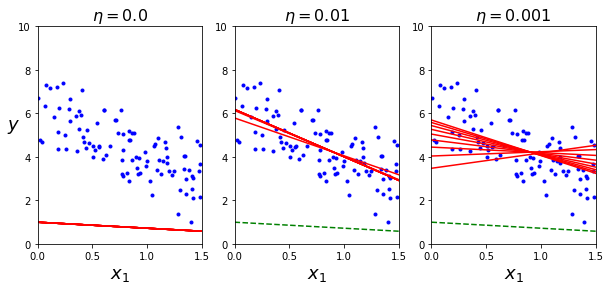

In [15]:
import matplotlib.pyplot as plt
np.random.seed(42)

B_hat_BGD = 2*np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(B_hat_BGD, eta=0.0)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(B_hat_BGD, eta=0.01, B_path=B_path_BGD)
plt.subplot(133); plot_gradient_descent(B_hat_BGD, eta=0.001, B_path=B_path_BGD)

plt.show()

#### 확률적 경사 하강법의 장단점
- 장점: 배치 경사 하강법에 비해 빠름, 하나의 샘플에 대한 그래디언트만 계산, 즉 데이터가 매우 클 때 유용함, 배치 경사 하강법에 비해 비용함수가 불규칙할 경우 알고리즘이 지역 최솟값(local minimum)을 건너뛸 가능성이 높음
- 단점: 배치 경사 하강법에 비해 불안정, 일정하게 비용함수가 감소하는 것이 아니라 요동치기 때문에 평균적으로 감소 배치 경사 하강법에 비해 전역 최솟값(global minimum)에 다다르지 못함, 하이퍼 파라미터 증가

In [16]:
n_epochs = 50
eta = 0.01

B_hat_SGD = np.random.randn(2,1)  # 초기화

for epoch in range(n_epochs):
    for i in range(m):
        stoch_index = np.random.randint(m)
        xi = X_b[stoch_index:stoch_index+1]
        yi = y[stoch_index:stoch_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(B_hat_SGD) - yi)
        B_hat_SGD = B_hat_SGD - eta * gradients 
        
        
B_hat_SGD

array([[ 6.29614633],
       [-2.18362342]])

## 질문 : 위의 예제를 통해 배치 경사하강법의 반복수와 확률적 경사하강법의 반복수에 대해서 비교하시오.

## Answer
- **BDG(배치 경사하강법)**은 전체 데이터 셋에 대해 업데이트가 이루어지기 때문에 계산이 오래 걸리고 업데이트 반복수 자체가 적다. 하지만, 전체 데이터에 대해서 업데이트가 이루어지는만큼 optimal 수렴이 안정적이다.
- **SGD(확률적 경사하강법)**은 랜덤으로 추출된 데이터에 대해서 Gradient를 업데이트 하기 때문에 계산이 비교적 빠르고 업데이트의 반복수 자체는 BDG에 비해 훨씬 높다. 이때, 매번 확률적으로 데이터를 뽑아서 업데이트를 하기 때문에 global minimum 주위에서 불안정하게 oscillating한다

#### 미니 배치 경사 하강법
미니 배치 경사 하강법은 확률적 경사 하강법과 달리 랜덤한 파트가 없으나 이와 비슷하게 모든 데이터를 매번 사용하지 않습니다. 대신 매 스탭에서 미니 배치라는 임의의 작은 샘플 세트에 대해 그래디언트를 계산하여 감소하는 방향으로 파라미터를 업데이트합니다.
    - 장점: 배치 경사 하강법에 비해 빠름, 확률적 경사 하강법과 달리 랜덤 파트도 없어서 더욱 빠름, 미니배치가 어느정도 크면 확률적 경사 하강법에 비해 전역 최솟값에 더 가까이 도달
    - 단점: 확률적 경사 하강법에 비해 지역 최솟값에서 빠져나오기는 더 힘들 수 있음, 마찬가지로 하이퍼 파라미터 증가

In [17]:
n_epoch = 50
minibatch_size = 20

np.random.seed(42)
B_hat_MGD = np.random.randn(2,1)  # 무작위 초기화

# learning schedule을 추가
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_epoch):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(B_hat_MGD) - yi)
        eta = learning_schedule(t)
        B_hat_MGD = B_hat_MGD - eta * gradients
        
B_hat_MGD

array([[ 6.13897052],
       [-2.19109507]])

## Summary : Gradient Descent
- **Batch Gradient Descent** :
파라미터를 업데이터 할때마다 모든 학습 데이터 셋을 사용하여 cost function의 gradient를 계산하기 때문에 안정적으로 optimal optimal에 수렴할수 있으나, 수렴될 경우 탈출하기 어려울 수 있고 오랜시간이 단점이다.
- **Stochastic Gradient Descent** :
무작위로 추출된 한개의 데이터를 사용하여 cost function의 gradient를 계산하여 업데이트를 하기 때문에 불안정적이기는 하나, 이는 local optimal에 수렴될 리스크를 줄여주고 계산이 빨라져서 업데이트 횟수가 증가된다. 대신, 수렴된 값이 global minimum인지는 불확실하다
- **Mini Batch Gradient Descent** :
일정량의 데이터를 추출하여 cost function의 gradient를 계산하고 평균 기울기를 이용하여 업데이트를 하기 때문에 BGD보다 계산량이 적고 SGD보다 안정적인 장점이 있다

### 4. 보내드린 파일의 코드를 중심으로 만약 회귀분석에 대해서 전반적으로 설명을 한다면 어떠한 그림을 그려주면 좋을지 고민하고 배운 내용이 모두 담기도록 자신만의 보고서(closed form으로 해구하기., 3가지 경사하강법으로 구하기, 학습률에 따른 변화 보여주기, 학습이 진행됨에 따라 직선이 변화되는 그림 보여주기 등 반드시 포함할 것) 를 작성해서 제출합니다. (코드로 작성)

- 교수님 코드 밑에 '회귀분석 설명코드' 작성해뒀습니다.

In [39]:
pip install mglearn


  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=e88c86c6036eea525304c1ea2065f892dd3e9b5cae5e9b43f1ab0522a53509b8
  Stored in directory: c:\users\kmr14\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


C:\Users\kmr14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmr14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


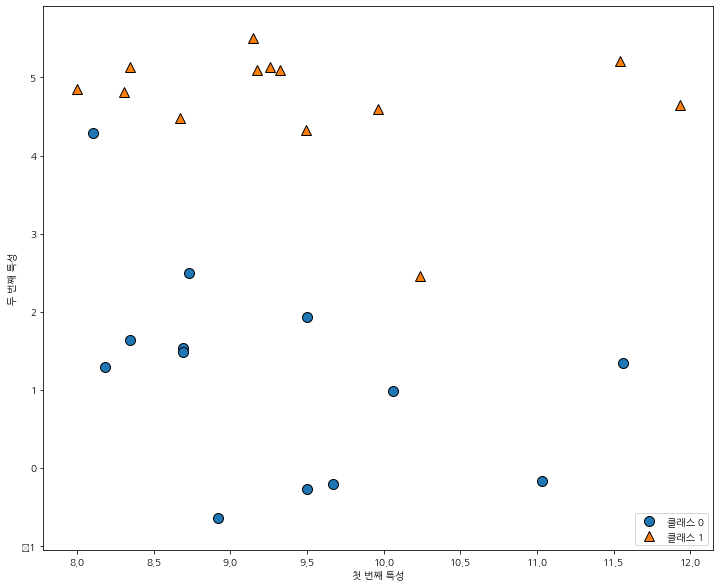

In [40]:
import mglearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sklearn

mpl.rc('font', family='NanumGothic')#한글출력
X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

Text(0, 0.5, '타깃')

C:\Users\kmr14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmr14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


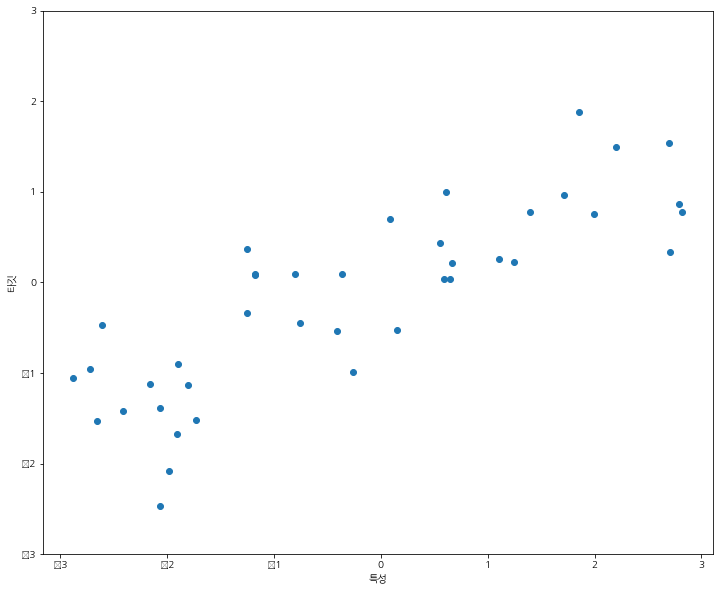

In [41]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [42]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [43]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [44]:
print("클래스별 샘플 개수:\n", {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [45]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


w[0]: 0.393906  b: -0.031804


C:\Users\kmr14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmr14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


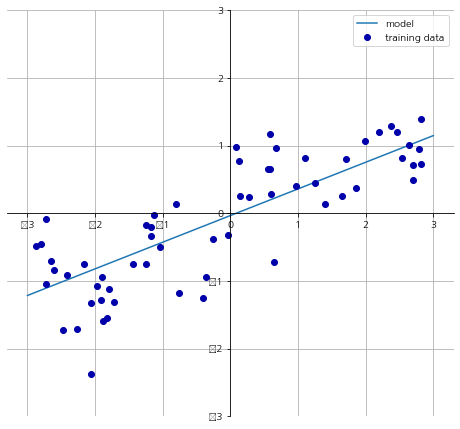

In [46]:
mglearn.plots.plot_linear_regression_wave()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)
lr=LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973


- training set 과 testing set에 대해 회귀모형 적합 결과의 설명력(R^2) 을 점수라고 합니다. 0.67의 의미는 추정된 회귀직선이 주어진 자료의 67%를 설명한다.

In [48]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# training set, testing set의 점수가 유사하다는 것은 무엇을 의미할까요? -> fitting 잘됨

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [49]:
X,y=mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=0)
lr=LinearRegression().fit(X_train, y_train)

In [50]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# training set의 점수는 높으나 testing set의 점수는 낮다는 것은 무엇을 의미할까요? -> overfitting

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


#### 정규방정식을 이용한 회귀분석

In [51]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [52]:
X_b=np.c_[np.ones((100,1)),X] #모든 샘플에 x0=1을 추가합니다.
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 정규방정식을 이용한 해를 직접 계산하기

In [53]:
theta_best

array([[4.17795097],
       [2.87092976]])

In [54]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0=1을 추가합니다.
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.17795097],
       [9.91981048]])

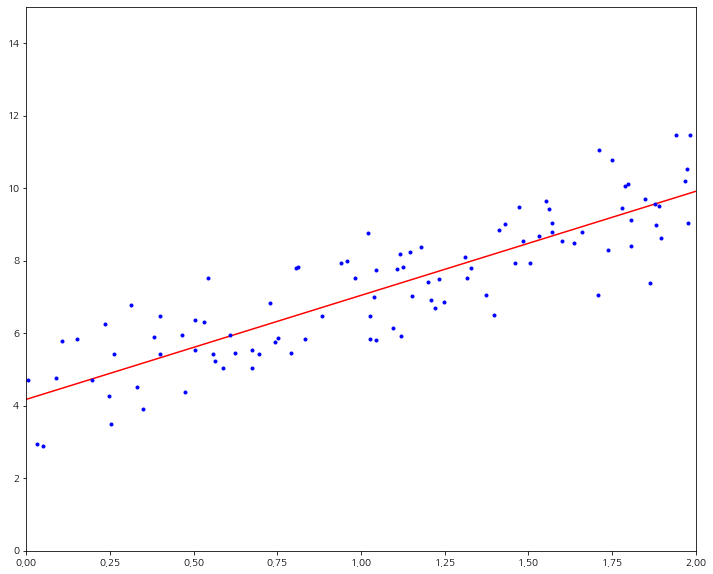

In [56]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [57]:
from sklearn.linear_model import LinearRegression  #함수를 이용해서 정규방정식의 해 구하기
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_
lin_reg.predict(X_new)

array([[4.17795097],
       [9.91981048]])

- 역행렬이 존재하지 않으면 정규방정식은 사용할 수 없다. 하지만 유사역행렬은 구할 수 있고 정규 방정식을 사용할 때보다 효율적이다.

In [26]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)  #식에 의해 유사역행렬 구하기
theta_best_svd

array([[2.25],
       [8.  ]])

In [59]:
np.linalg.pinv(X_b).dot(y) #함수를 사용해서 구하기

array([[4.17795097],
       [2.87092976]])

- 경사하강법으로 구하기

In [60]:
eta=0.1 #학습률
n_iterations=1000
m=100
theta=np.random.randn(2,1) #무작위 초기화
for iteration in range(n_iterations):
    gradients=1/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [61]:
theta

array([[4.17795041],
       [2.87093021]])

# 회귀분석 설명코드

## What is Regression Analysis?
- In statistical modeling, regression analysis is a set of statistical processes for **estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features').**
- Regression analysis is widely used for **prediction** and **forecasting.**
- The most common form of regression analysis is **linear regression**, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion.

## 회귀분석 estimates 추정 방법

### 1. 정규방정식(sklearn.linear_model) 사용하여 추정하기
*참고 : sklearn 패키지 외에도 mglearn 라이브러리등 함수를 불러와서 사용할 수 있다*

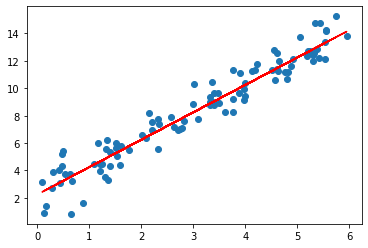

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#data scatter 확인
x = 6 * np.random.rand(100,1) # [0, 1) 범위에서 균일한 분포 100 X 1 array 
Y = 2.25 + 2*x + np.random.randn(100,1)# normal distribution(mu=0,var=1)분포 100 X 1 array
y = 2.25 + 2*x

x_b = np.c_[np.ones((100, 1)), x]

plt.plot(x, y, color='r', label='y = 2*X + 2.25')
plt.scatter(x,Y)
plt.show()

In [14]:
#함수를 이용해서 정규방정식의 해 구하기
#model fitting하기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_x, test_x, train_y, test_y=train_test_split(x,Y, random_state=42) #학습데이터와 훈련데이터로 나누기
lin_reg = LinearRegression()
lin_reg.fit(train_x,train_y)
print(lin_reg.intercept_,lin_reg.coef_)

[1.98809124] [[2.06879044]]


In [15]:
print("훈련 세트 R^2점수: {:.2f}".format(lin_reg.score(train_x, train_y)))
print("테스트 세트 R^2점수: {:.2f}".format(lin_reg.score(test_x, test_y)))

훈련 세트 R^2점수: 0.94
테스트 세트 R^2점수: 0.89


▶ 학습(훈련) 데이터의 경우, 회귀식이 데이터의 94%를 설명할 수 있고 테스트 데이터의 경우, 회귀식이 데이터의 89%를 설명하고 있다.

▶ 주의 : 학습 데이터의 설명력이 테스트 데이터 설명력에 비해 월등히 높을 경우, 과적합(overfitting)을 의심해야한다
    - parameter 조정함수
    1. rigde regression 
    2. lasso regression 

※ 주의 : 역행렬이 존재하지 않으면 정규방정식은 사용할 수 없다. 하지만 유사역행렬은 구할 수 있고 정규 방정식을 사용할 때보다 효율적이다.

In [16]:
#식에 의해 유사역행렬 구하기
theta_best_svd,residuals,rank,s=np.linalg.lstsq(x_b,Y,rcond=1e-6)
theta_best_svd

array([[2.25362276],
       [2.02140992]])

### 2. 경사 하강법(GD) 사용하여 추정하기

### What is Gradient Descent ?
- Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function.
- This method is commonly used in machine learning (ML) and deep learning(DL) to **minimise a cost/loss function (e.g. in a linear regression).**

In [17]:
#2-1.배치 경사 하강법
eta = 0.01 # 내려가는 스탭의 크기
n_iter = 10000 # 10000번 반복
m = 100 # sample 수
B_hat_BGD = np.random.randn(2,1) # B_hat 초기값

for iteration in range(n_iter):
    gradients = 2/m * x_b.T.dot(x_b.dot(B_hat_BGD) - Y)
    B_hat_BGD = B_hat_BGD - eta * gradients

B_hat_BGD

array([[2.25362276],
       [2.02140992]])

In [18]:
B_hat = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(Y)  # linalg : 선형대수 모듈
print (B_hat)

[[2.25362276]
 [2.02140992]]


In [132]:
#학습률에 따라 비교하기

In [19]:
B_path_BGD = []

def plot_gradient_descent(B_hat, eta, B_path=None):
    m = 100
    plt.plot(x, Y, "b.")
    n_iter = 10000
    for iter in range(n_iter):
        if iter%1000 == 0:
            x_new = np.array([[0], [6]])  # x의 범위 [0, 6]
            x_new_b = np.c_[np.ones((2, 1)), x_new]
            Y_predict = x_new_b.dot(B_hat)
            
            style = "r-" if iter > 0 else "g--"
            plt.plot(x_new, Y_predict, style)
        gradients = 2/m * x_b.T.dot(x_b.dot(B_hat) - Y)
        B_hat = B_hat - eta * gradients
        if B_path is not None:
            B_path.append(B_hat)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 6, 0, 10])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

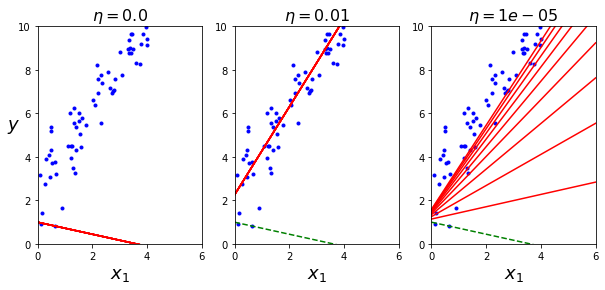

In [20]:
import matplotlib.pyplot as plt
np.random.seed(42)

B_hat_BGD = 2*np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(B_hat_BGD, eta=0.0)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(B_hat_BGD, eta=0.01, B_path=B_path_BGD)
plt.subplot(133); plot_gradient_descent(B_hat_BGD, eta=0.00001, B_path=B_path_BGD)

plt.show()

▶ 학습률이 지나치게 작거나 크면 회귀식이 적절하지 못함, 사용자가 직접 튜닝을 해야함

In [21]:
#2-2. 확률적 경사 하강법
n_epochs = 50
eta = 0.01

B_hat_SGD = np.random.randn(2,1)  # 초기화

for epoch in range(n_epochs):
    for i in range(m):
        stoch_index = np.random.randint(m)
        xi = x_b[stoch_index:stoch_index+1]
        yi = Y[stoch_index:stoch_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(B_hat_SGD) - yi)
        B_hat_SGD = B_hat_SGD - eta * gradients 
        
        
B_hat_SGD

array([[2.29550186],
       [1.93486685]])

In [22]:
#2-3. 미니배치 경사 하강법
n_epoch = 50
minibatch_size = 2

np.random.seed(42)
B_hat_MGD = np.random.randn(2,1)  # 무작위 초기화

# learning schedule을 추가
t0, t1 = 2, 100
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_epoch):
    shuffled_indices = np.random.permutation(m)
    x_b_shuffled = x_b[shuffled_indices]
    y_shuffled = Y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        t += 1
        xi = x_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(B_hat_MGD) - yi)
        eta = learning_schedule(t)
        B_hat_MGD = B_hat_MGD - eta * gradients
        
B_hat_MGD

array([[2.1957592 ],
       [2.04082954]])

# Conclusion
- 이렇듯, 회귀식의 estimate값을 추정하는 방법은 다양하고 각각의 방법들마다 하이퍼파라미터를 조정하여 사용할 수 있다.
- 회귀분석은 결국 **독립변수와 종속변수의 관계(회귀식)을 이끌어 내는 일**을 한다.